# Task 1: Acquire, Preprocess, and Analyze the Data


## DataSet Analysis - Breast Cancer Diagnosis


Link: http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Note: The dataset used is the breast-cancer-wisconsin.data

The DataSet has 11 features, including the diagnosis class (Benign or Malignant). One of the features (ID) can definitely be removed for the Classification


In [97]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [98]:
# Load the Breast Cancer Diagnosis dataset
URL = "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
data = pd.read_csv(URL, sep =',',names = ['ID','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelia Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class'])

# Remove any rows that have a ? (missing data) anywhere
data = data[~data.apply(lambda x: x.str.contains('\?'), axis=1).any(1)]
data.dropna(how = 'any')

# Display first ten records to get a picture of the data
data.head(20)

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelia Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [99]:
#Remove ID value as it is not required for the Model
del data['ID']

In [100]:
# Change class values from 2 (benign) to 0 and 4 (malignant) to 0
data["Class"] = 1*(data["Class"]>3)

print(data["Class"])
data.head(20)

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: Class, Length: 683, dtype: int32


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelia Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
5,8,10,10,8,7,10,9,7,1,1
6,1,1,1,1,2,10,3,1,1,0
7,2,1,2,1,2,1,3,1,1,0
8,2,1,1,1,2,1,1,1,5,0
9,4,2,1,1,2,1,2,1,1,0


In [101]:
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelia Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.445095,2.869693,1.603221,0.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [102]:
 #Number benign (0) and malignant (1) results
    
malignant = data.loc[(data['Class'] == 1)] 
number_of_malignant = malignant.shape[0]

benign = data.loc[(data['Class'] == 0)]
number_of_benign = benign.shape[0]

print("Total Number of Patients: " + str(number_of_malignant + number_of_benign))
print("Number of Malignant = " + str(number_of_malignant))
print("Number of Benign = " + str(number_of_benign))

#Percentage of Malignant
Percentage_of_malignant = (number_of_malignant/(number_of_benign+number_of_malignant))*100

print("Percentage of Malignant = " + str(int(Percentage_of_malignant)) + '%')

Total Number of Patients: 683
Number of Malignant = 239
Number of Benign = 444
Percentage of Malignant = 34%


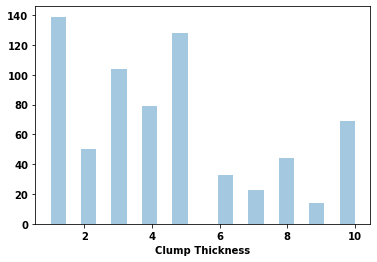

In [103]:
#Plot the Distributions of the features
sns.distplot(data['Clump Thickness'], bins = 20, kde = False)

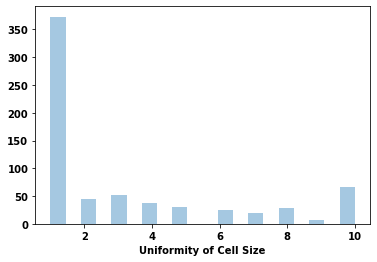

In [104]:
sns.distplot(data['Uniformity of Cell Size'],bins = 20, kde = False)

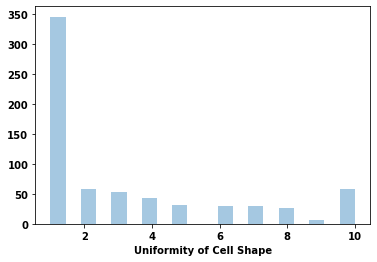

In [105]:
sns.distplot(data['Uniformity of Cell Shape'],bins = 20, kde = False)

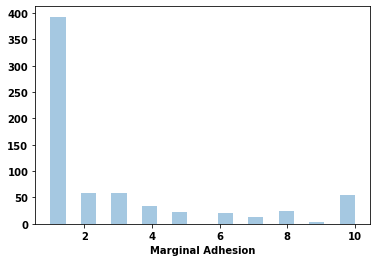

In [106]:
sns.distplot(data['Marginal Adhesion'],bins = 20, kde = False)

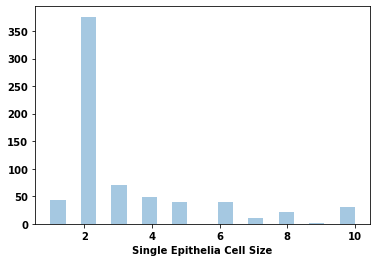

In [107]:
sns.distplot(data['Single Epithelia Cell Size'],bins = 20, kde = False)

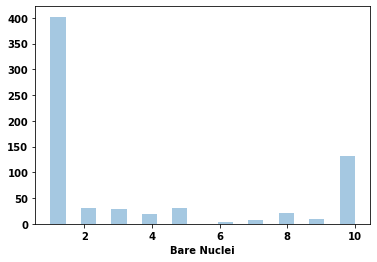

In [108]:
sns.distplot(data['Bare Nuclei'],bins = 20, kde = False)

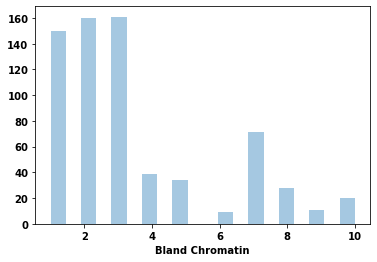

In [109]:
sns.distplot(data['Bland Chromatin'],bins = 20, kde = False)

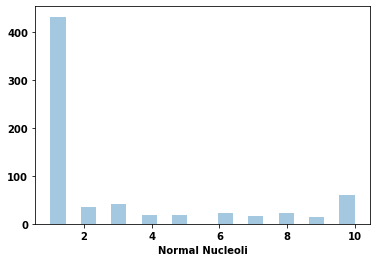

In [110]:
sns.distplot(data['Normal Nucleoli'],bins = 20, kde = False)

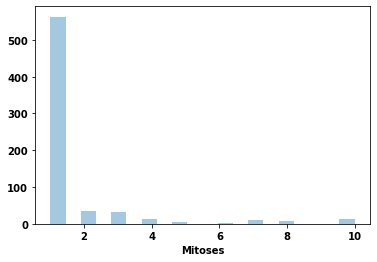

In [111]:
sns.distplot(data['Mitoses'],bins = 20, kde = False)
#plt.hist(data['Mitoses'])

(8.0, 1.0)

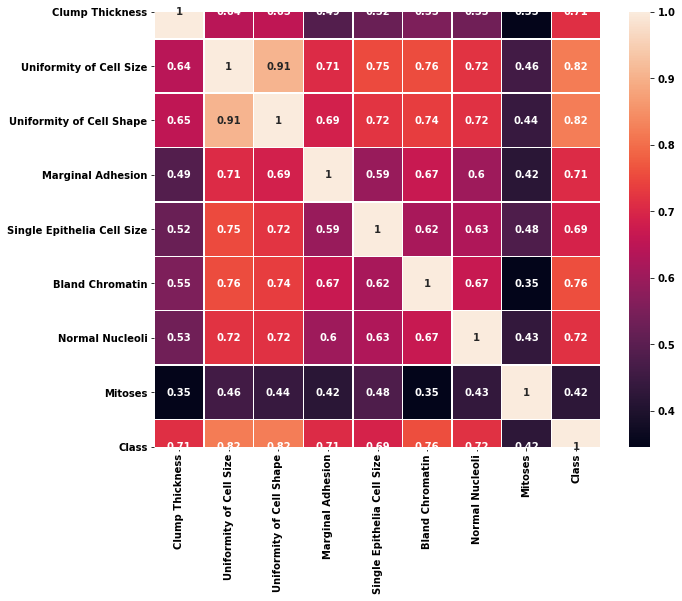

In [112]:
#Correlation between Features
corr = data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, xticklabels=corr.columns,yticklabels=corr.columns, linewidths=0.5, linecolor="white")
ax.get_ylim()


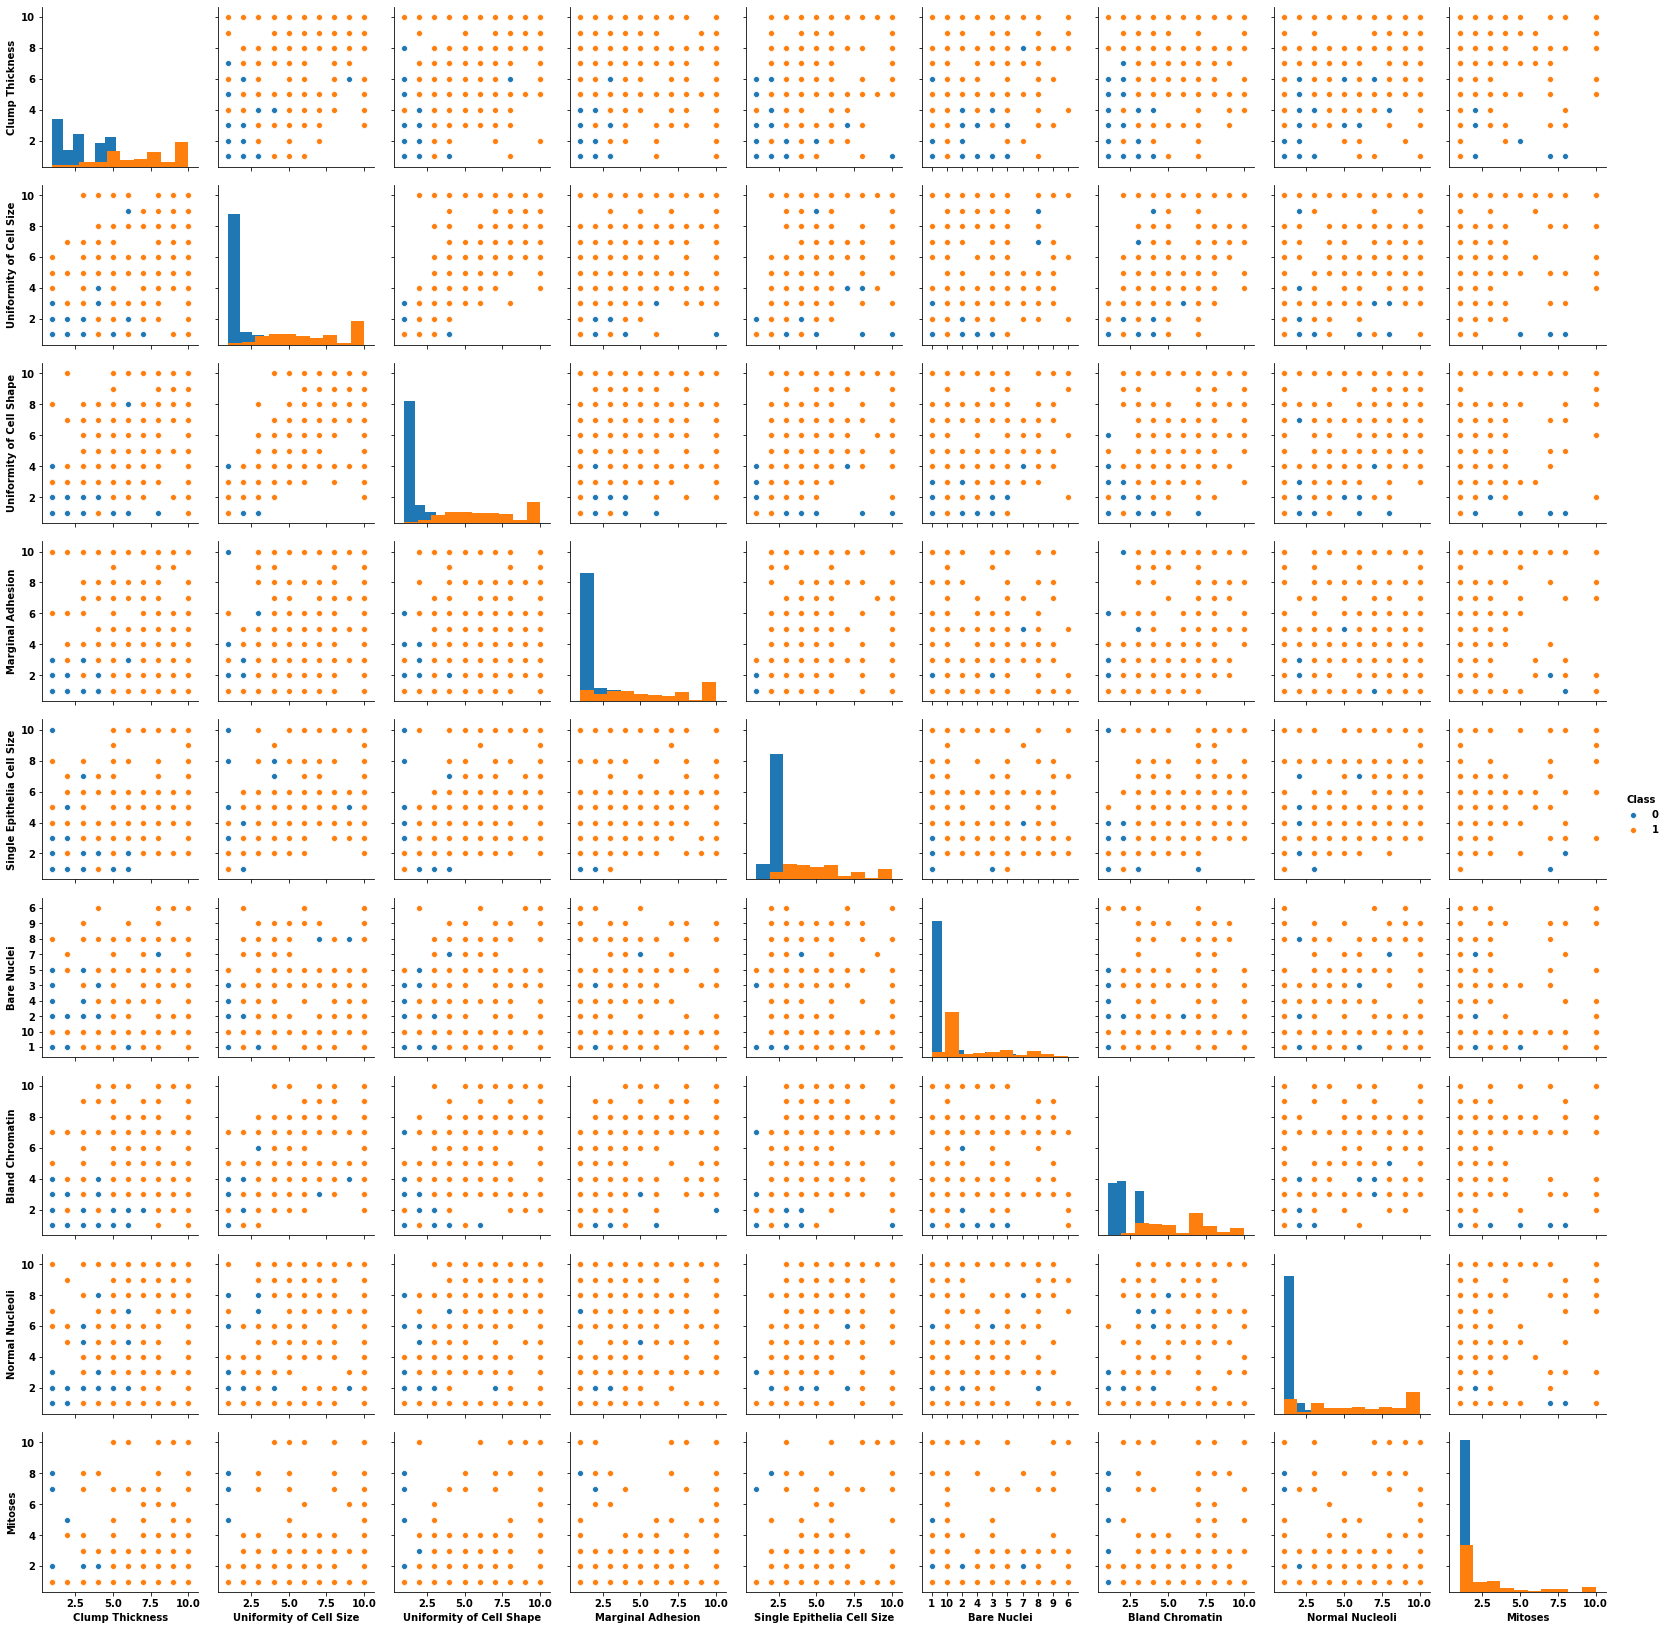

In [113]:
#Scatter Plot of Pair Wise Features

Scatter = sns.pairplot(data , hue = "Class", kind = 'scatter', diag_kind = 'hist')

#Need to reduce this to smaller subsets of features as the plot is useless (data.iloc())

In [114]:
#Split Data between Positive and Negative Results
positive = data['Class'] == 1
pos_data = data[positive]
negative = data['Class'] == 0
neg_data = data[negative]


(7, 0)

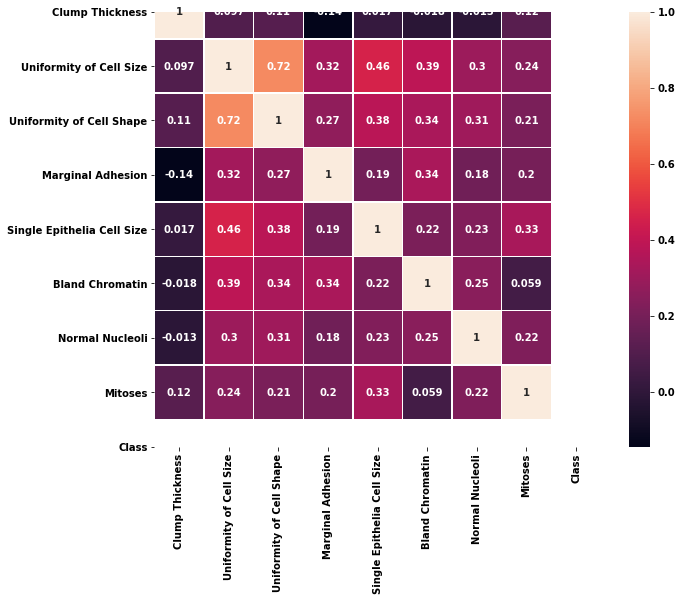

In [115]:
#Correlation for positive results
pos_corr = pos_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(pos_corr, annot=True,xticklabels=pos_corr.columns,yticklabels=pos_corr.columns, linewidths=0.5, linecolor="white")
ax.get_ylim()
ax.set_ylim(7, 0)

(9, 0)

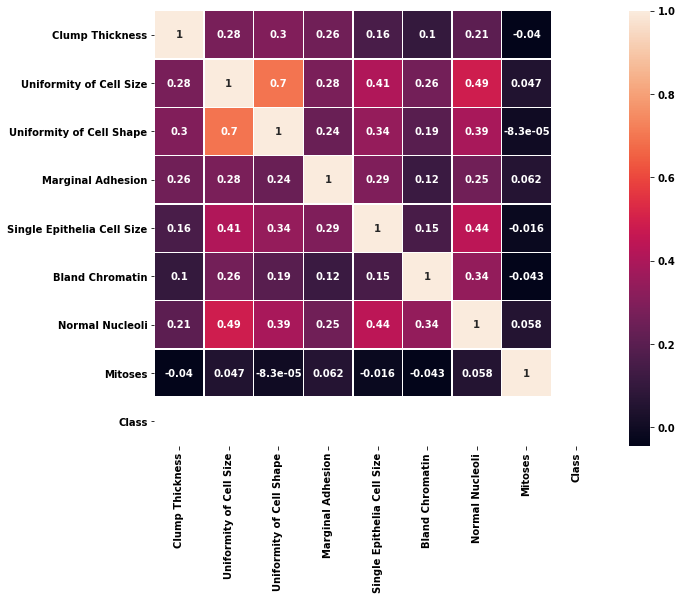

In [116]:
#Correlation for negative results
neg_corr = neg_data.corr()

plt.figure(figsize=(10,8))
ax = sns.heatmap(neg_corr, annot=True, xticklabels=neg_corr.columns,yticklabels=neg_corr.columns, linewidths=0.5, linecolor="white")
ax.get_ylim()
ax.set_ylim(9, 0)

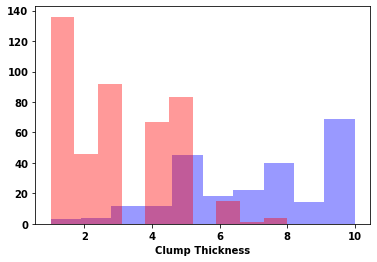

In [117]:
#Distribution of Positive vs Negative Results
sns.distplot(pos_data['Clump Thickness'], bins = 10, color = 'b', kde = False)
sns.distplot(neg_data['Clump Thickness'], bins = 10, color = 'r', kde = False)

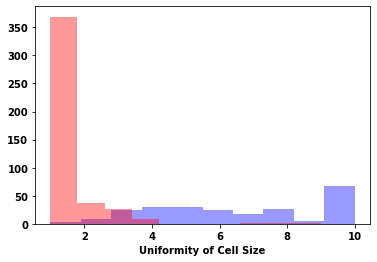

In [118]:
sns.distplot(pos_data['Uniformity of Cell Size'], bins = 10, color = 'b', kde = False)
sns.distplot(neg_data['Uniformity of Cell Size'], bins = 10, color = 'r', kde = False)

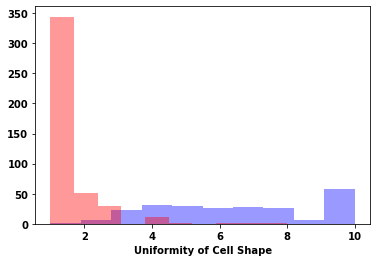

In [119]:
sns.distplot(pos_data['Uniformity of Cell Shape'], bins = 10, color = 'b', kde = False)
sns.distplot(neg_data['Uniformity of Cell Shape'], bins = 10, color = 'r', kde = False)

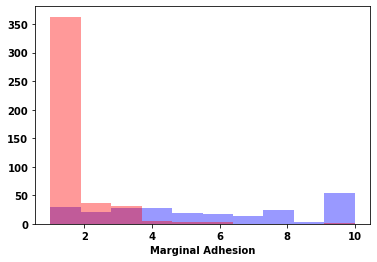

In [120]:
sns.distplot(pos_data['Marginal Adhesion'],bins = 10, color = 'b', kde = False)
sns.distplot(neg_data['Marginal Adhesion'],bins = 10, color = 'r', kde = False)

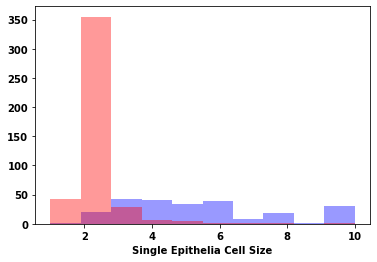

In [121]:
sns.distplot(pos_data['Single Epithelia Cell Size'],bins = 10, color = 'b', kde = False)
sns.distplot(neg_data['Single Epithelia Cell Size'],bins = 10, color = 'r', kde = False)

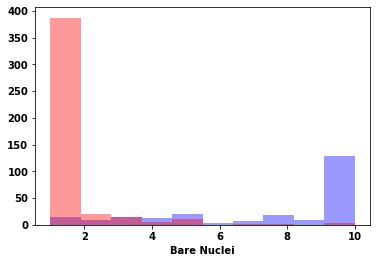

In [122]:
sns.distplot(pos_data['Bare Nuclei'],bins = 10, color = 'b', kde = False)
sns.distplot(neg_data['Bare Nuclei'],bins = 10, color = 'r', kde = False)

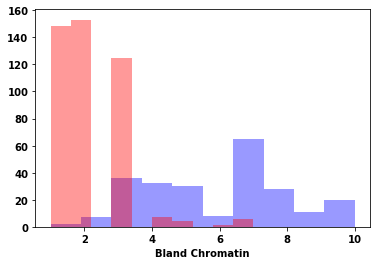

In [123]:
sns.distplot(pos_data['Bland Chromatin'],bins = 10, color = 'b', kde = False)
sns.distplot(neg_data['Bland Chromatin'],bins = 10, color = 'r', kde = False)

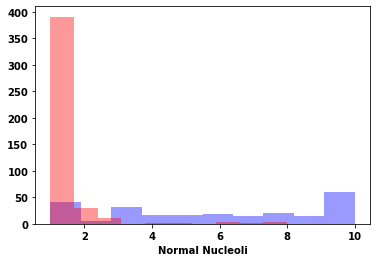

In [124]:
sns.distplot(pos_data['Normal Nucleoli'],bins = 10, color = 'b', kde = False)
sns.distplot(neg_data['Normal Nucleoli'],bins = 10, color = 'r', kde = False)

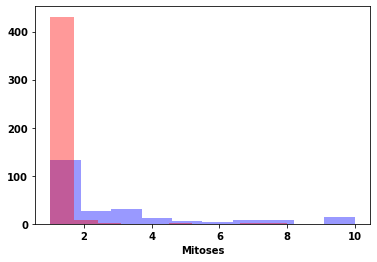

In [125]:
sns.distplot(pos_data['Mitoses'],bins = 10, color = 'b', kde = False)
sns.distplot(neg_data['Mitoses'],bins = 10, color = 'r', kde = False)

In [126]:
# Split Data between Training and Test Data (80/20 split)
# Needs to be randomly split

#Create Copy of Data Set and Then create training set and test set
data_copy = data.copy()
train_set = data_copy.sample(frac=0.80, random_state=0) #random state = 0 means the split will be zero each run
test_set = data_copy.drop(train_set.index)
          
x_train = np.array(train_set.iloc[:, :-1], dtype = int)
y_train = np.array(train_set["Class"], dtype = int)
          
x_test = np.array(test_set.iloc[:, :-1], dtype = int)
y_test = np.array(test_set["Class"], dtype = int)

print("x_train size: ", x_train.shape)
print("y_train size: ", y_train.shape)
print("x_test size: ", x_test.shape)
print("y_test size: ", y_test.shape)

x_train size:  (546, 9)
y_train size:  (546,)
x_test size:  (137, 9)
y_test size:  (137,)
